In [442]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [443]:
mouse_metedata = 'Resources/mouse_metadata.csv'
study_results = 'Resources/data_Study_results.csv'

study_df = pd.read_csv(study_results)
mouse_df = pd.read_csv(mouse_metedata)

In [444]:
# find duplicate and drop all values associated with value
dup_ids = study_df[['Mouse ID', 'Timepoint']].value_counts()
dup_ids.to_csv('Resources/duplicate_data.csv')

# drop g989
study_df.drop(study_df.loc[study_df['Mouse ID']== 'g989'].index, inplace=True)

In [445]:
# merging two data frames
merged_df = pd.merge(study_df, mouse_df, on = 'Mouse ID')

In [446]:
merged_df.head(5)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [447]:
# Generate a summary statistics table consisting of the mean, median, variance,
# standard deviation, and SEM of the tumor volume for each drug regimen.

In [448]:
drug_regimen_mean = merged_df.groupby(['Drug Regimen']).mean()['Tumor Volume (mm3)']
drug_regimen_median = merged_df.groupby(['Drug Regimen']).median()['Tumor Volume (mm3)']
drug_regimen_var = merged_df.groupby(['Drug Regimen']).var()['Tumor Volume (mm3)']
drug_regimen_std = merged_df.groupby(['Drug Regimen']).std()['Tumor Volume (mm3)']
drug_regimen_sem = merged_df.groupby(['Drug Regimen']).sem()['Tumor Volume (mm3)']

drug_regimen_df = pd.DataFrame({'Mean':drug_regimen_mean,
                               'Median':drug_regimen_median,
                               'Variance':drug_regimen_var,
                               'Stand. Dev':drug_regimen_std,
                               'SEM':drug_regimen_sem,})
drug_regimen_df

,Mean,Median,Variance,Stand. Dev,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [449]:
# Bar plots using Pandas / Matplotlibs to find total mice per treatment

In [450]:
totalmice_pds = merged_df[['Drug Regimen','Mouse ID']]
totalmice_pds_2 = totalmice_pds['Drug Regimen'].value_counts()

<IPython.core.display.Javascript object>


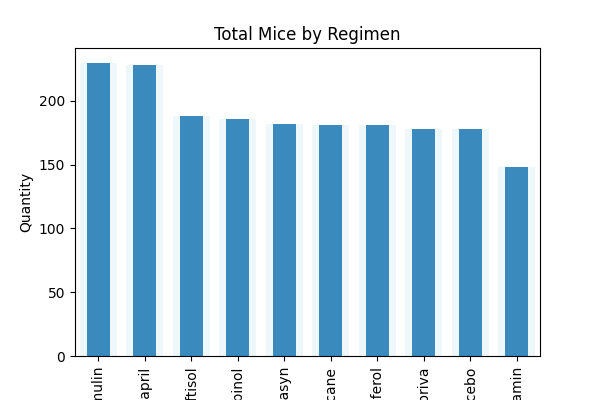

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

In [451]:
# bar graph using pandas
totalmice_pds_2.plot(kind='bar', figsize = (6,4))

# aesthetics
plt.title('Total Mice by Regimen')
plt.xlabel('Regimen')
plt.ylabel('Quantity')
plt.show()
plt.tight_layout

In [464]:
# bargraph using pyplot
unique_regimen = merged_df['Drug Regimen'].unique()

# find x and y axis
total_mice = [230, 228, 188, 186, 182, 181, 181, 178, 178, 148]
x_axis = np.arange(len(total_mice))
regimens = [value for value in unique_regimen]

# bar graph
plt.bar(x_axis, total_mice, color = 'lightblue', alpha = 0.2, align = 'center')

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, regimens)

# aesthetics
plt.title('Total Mice by Regimen')
plt.xlabel('Regimen')
plt.ylabel('Quantity')
plt.show()
plt.tight_layout

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

In [465]:
# Generate a pie plot using both Pandas's DataFrame.plot() and Matplotlib's 
# pyplot that shows the distribution of female or male mice in the study.

In [466]:
merged_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [467]:
group_bysex = merged_df.groupby(['Mouse ID','Sex'])

male_female_df = pd.DataFrame(group_bysex.size())
male_female = pd.DataFrame(male_female_df.groupby(["Sex"]).count())
male_female.columns = ["Total Distribution"]

male_female["Percentage"] = (100*(male_female["Total Distribution"]/male_female["Total Distribution"].sum()))
male_female["Percentage"] = male_female["Percentage"]

male_female

,Total Distribution,Percentage
Sex,,
Female,123,49.596774
Male,125,50.403226


<IPython.core.display.Javascript object>


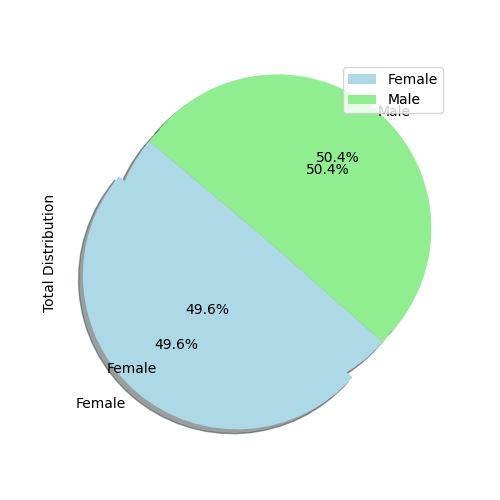

In [468]:
colors = ['lightblue', 'lightgreen']
plot = male_female.plot.pie(y='Total Distribution', colors = colors,
                            explode = (0,.1), shadow = True,
                            startangle = 140, autopct="%1.1f%%",
                            figsize=(5,5))

In [469]:
sizes = [49.59, 50.41]
explode = (0.3, 0)
labels = ["Female","Male"]
colors = ['lightblue', 'lightgreen']

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%",
        shadow=True, startangle=140)

plt.axis("equal")

(-1.3280250584584767,
 1.1862293340632641,
 -1.359154690850272,
 1.199516580409116)

In [ ]:
# Calculate the final tumor volume of each mouse across four of the most
# promising treatment regimens: Capomulin, Ramicane, Infubinol, and Ceftamin.
# Calculate the quartiles and IQR and quantitatively determine if there are any
# potential outliers across all four treatment regimens.

In [470]:
merged_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
